# Titanic Analysis and Survival Prediction using Machine Learning

By Hamza Khan

# Objectives 

- Analyze key features like age, gender, fare, passenger class, and survival status to understand their relationships and importance.
- Address missing values and ensure data is clean for analysis, applying techniques like imputation and normalization.
Exploratory Data Analysis (EDA)
- Uncover insights through data visualizations and statistical analysis to identify significant trends affecting survival.
- Build and train a machine learning model using logistic regression to predict survival outcomes based on the selected features.
- Assess the model’s accuracy using performance metrics like accuracy.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.shape

(891, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

# Checking and Handling the Missing Values

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df.drop(columns = 'Cabin', axis = 1, inplace = True)

Out of 891 rows, there are 687 rows in the Cabin column that are missing values, hence we cannot impute them so the column is useless to us and we will delete the column.

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14068\2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [39]:
df['Embarked'].value_counts()

Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64

In [41]:
df['Embarked'].mode()

0    0.0
Name: Embarked, dtype: float64

Since there are only 2 Missing Values in the Embarked column, we will impute it with the most frequent value.

In [43]:
df['Embarked'].mode()[0]

0.0

In [45]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14068\1994620826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the Missing Values were Successfully Imputed

# Checking for Duplicate Values

In [61]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [63]:
df.duplicated().sum()

0

There are no duplicate values in the data.

# Data Analysis

In [68]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data Visualisation

Text(0, 0.5, 'Count')

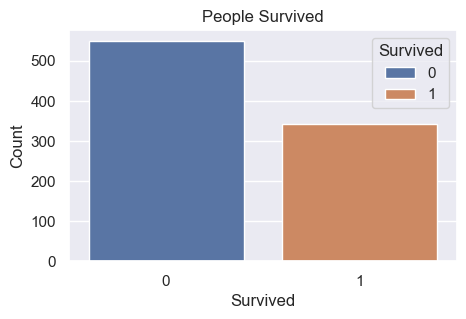

In [121]:
sns.set()
plt.figure(figsize = (5,3))
sns.countplot(x = df['Survived'], hue = df['Survived'])
plt.title('People Survived')
plt.ylabel('Count')

The Plot above shows that most people did not survive.

In [91]:
(df[df['Survived'] == 1].shape[0]/df['Survived'].shape[0]) * 100

38.38383838383838

The above calculations shows the percentage of people that survived which turns out to be 38%

In [111]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [162]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

Text(0, 0.5, 'Count')

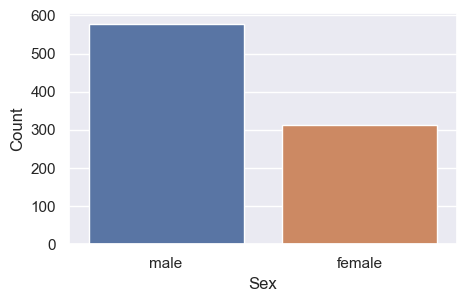

In [119]:
sns.set()
plt.figure(figsize = (5,3))
sns.countplot(x = df['Sex'], hue = df['Sex'])
plt.ylabel('Count')

The above Plot shows the count of people by Sex.

Text(0, 0.5, 'Count')

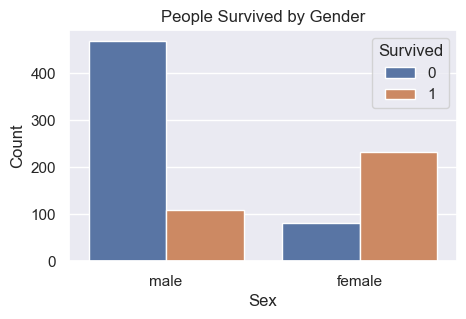

In [129]:
plt.figure(figsize = (5,3))
sns.countplot(x = df['Sex'], hue = df['Survived'])
plt.title('People Survived by Gender')
plt.ylabel('Count')

The Plot above shows that most men did not survive and women survivals were in higher quantity. 

Text(0, 0.5, 'Count')

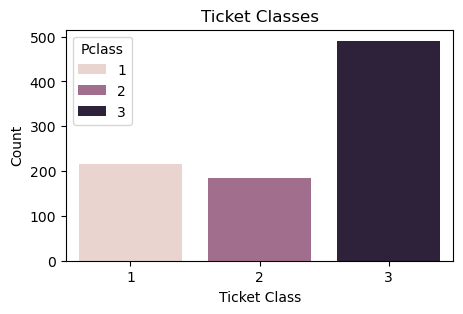

In [7]:
plt.figure(figsize = (5,3))
sns.countplot(x = df['Pclass'], hue = df['Pclass'])
plt.title('Ticket Classes')
plt.xlabel('Ticket Class')
plt.ylabel('Count')

The above Plot shows the distribution of people by the Passenger Class.

Text(0, 0.5, 'Count')

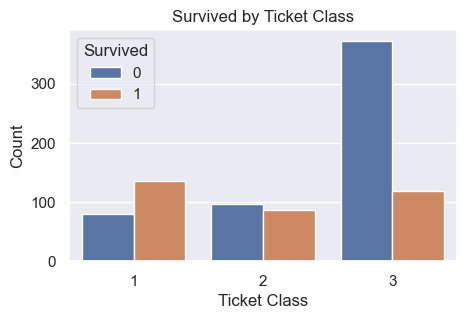

In [158]:
plt.figure(figsize = (5,3))
sns.countplot(x = df['Pclass'], hue = df['Survived'])
plt.title('Survived by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')

The above plot shows the count of people by the passenger class and whether if they survived or not.

Text(0, 0.5, 'Count')

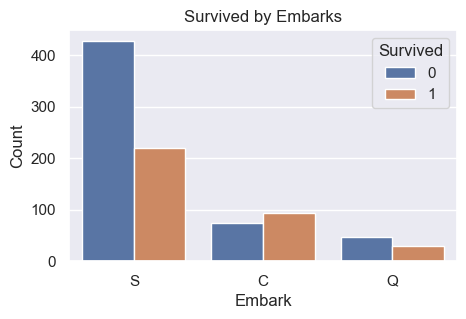

In [160]:
plt.figure(figsize = (5,3))
sns.countplot(x = df['Embarked'], hue = df['Survived'])
plt.title('Survived by Embarks')
plt.xlabel('Embark')
plt.ylabel('Count')

The above plot shows the number of people by their Embark locations and whether they survived or not.

Text(0, 0.5, 'Count')

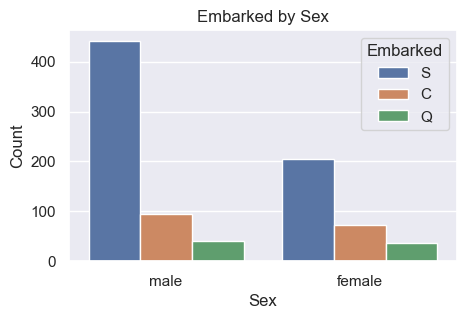

In [164]:
plt.figure(figsize = (5,3))
sns.countplot(x = df['Sex'], hue = df['Embarked'])
plt.title('Embarked by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

The above plot shows the number of peopple distributed by their Sex and their Embarked locations.

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Replacing Categorical Columns with 0 and 1 for Prediction Model 

In [22]:
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14068\230828461.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace = True)


In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [49]:
df['Embarked'] = df['Embarked'].astype(int)

In [51]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [53]:
df['Age'] = df['Age'].astype(int)

In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,1


# Seperating Features and Target from the Dataset 


In [95]:
# Features
X =df.drop(columns = ['Name', 'Ticket', 'PassengerId', 'Survived'], axis = 1) 

# Target
Y = df['Survived']

We have seperated our dataset in two different sets, 'X' and 'Y'. Data from 'X' will be used to create the model that will be trained. The data from 'Y' will be used to compare the accuracy of our model that we will train from the data of 'X'. 
'X' is the features data that we have to train into the model in order to train it and 'Y' is the Target that we have to predict our model on.

In [99]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [101]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7.2500,0
1,1,1,38,1,0,71.2833,1
2,3,1,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0
887,1,1,19,0,0,30.0000,0
888,3,1,29,1,2,23.4500,0
889,1,0,26,0,0,30.0000,1


# Splitting the Data into Training Data and Testing Data

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [107]:
X.shape, X_train.shape, X_test.shape

((891, 7), (712, 7), (179, 7))

# Model Training 

In [109]:
model = LogisticRegression()

In [111]:
model.fit(X_train, Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

Accuracy Score

In [121]:
X_train_prediction = model.predict(X_train)

In [123]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [127]:
print('The training data accuracy is:', training_data_accuracy)

The training data accuracy is: 0.797752808988764


The Accuracy of our training data turns out to be almost 80% which means that the model has been trained good.

In [130]:
X_test_prediction = model.predict(X_test)

In [136]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [138]:
print('The testing data accuracy is:', testing_data_accuracy)

The testing data accuracy is: 0.8268156424581006


The Accuracy of our training data turns out to be almost 83% which means that the model has our testing data been trained good as well.